In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read data in

In [3]:
df_in=pd.read_parquet('data/bizwiz_value_score_2.parquet')

In [4]:
df_in.head()

,id,pptitle,ppdesc,ppdetails,ppfinancials,pcategories,COUNTY_NAME,STATE_NAME,price,cash_flow,...,established,POVERTY_PERCENT,MEDIAN_HOUSEHOLD_INCOME,bizwiz_value_score,bizwiz_class,bizwiz_label,label_num,label,exp(sqrt(cash_flow) - cash_flow),sqrt(cash_flow + sqrt(gross_revenue))
1427,2045193.0,number year establish clean busi sussex counti...,profit establish clean busi sussex counti nj o...,locat sussex counti nj employe number reason s...,ask price number cash flow number gross revenu...,"[business_for_sale, new_jersey, cleaning_busin...",Sussex,New Jersey,375000.0,123452.0,...,1989.0,6.1,99695.0,4.258429,3,high,2,high,0.0,352.074329
1428,2080887.0,east counti lumber ranch suppli campo california,east counti lumber ranch suppli locat center h...,locat campo ca inventori includ ask price real...,ask price number cash flow number gross revenu...,"[business_for_sale, california, other, campo]",San Diego,California,649000.0,221000.0,...,1970.0,10.7,90756.0,3.648217,2,medium,1,low,0.0,471.322132
1438,2073461.0,silk screen print busi sale passaic counti new...,lost leas readi retir complet factori strong c...,locat passaic counti nj employe number facil l...,ask price number cash flow number gross revenu...,"[business_for_sale, new_jersey, other, passaic...",Passaic,New Jersey,200000.0,0.0,...,1984.0,14.1,74016.0,4.225785,3,high,2,high,1.0,26.591479
1440,2034936.0,vapor smoke shop profit collin counti numberk ...,vapor smoke shop profit collin counti numberk ...,locat collin counti tx inventori includ ask pr...,ask price number cash flow number gross revenu...,"[business_for_sale, texas, smoke_shops, collin...",Collin,Texas,400000.0,140478.0,...,2020.0,6.6,102119.0,4.204387,3,high,2,high,0.0,375.831286
1444,2061655.0,tampa bay area window wash est number turnkey ...,start origin franchis becam independ system pl...,locat tampa fl inventori includ ask price empl...,ask price number cash flow number gross revenu...,"[business_for_sale, florida, cleaning_business...",Hillsborough,Florida,119000.0,75900.0,...,1998.0,14.3,65818.0,4.291999,3,high,2,high,0.0,276.224546


# work on categories

In [5]:
dfa=df_in
dfa['cat_n']=dfa['pcategories'].apply(lambda x: len(x))

In [6]:
dfa=dfa[dfa.cat_n > 1]

In [7]:
dfa['cat']=dfa['pcategories'].apply(lambda x: x[-2])

# work on financials

In [8]:
dfa=dfa[(dfa.price > 0) & (dfa.cash_flow  > 0) & (dfa.gross_revenue  > 0)]

In [9]:
dfa=dfa[(dfa.price > dfa.cash_flow)]

In [10]:
# want higest cash flow for lowest price
dfa['cf_p']=dfa.cash_flow/dfa.price

In [11]:
# want higest cash flow for lowest gross revenue
dfa['cf_gr']=dfa.cash_flow/dfa.gross_revenue

# plots

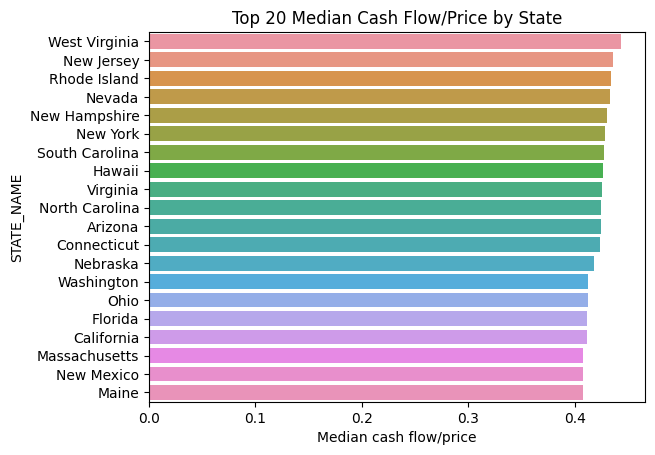

In [12]:
states_m_cf_p=pd.DataFrame({'Median cash flow/price': dfa.groupby('STATE_NAME')['cf_p'].median()})
states_m_cf_p.sort_values('Median cash flow/price',ascending=False,inplace=True)
sns.barplot(y=states_m_cf_p[0:20].index, x=states_m_cf_p[0:20]['Median cash flow/price'], orient='h')
plt.title("Top 20 Median Cash Flow/Price by State")
plt.show()

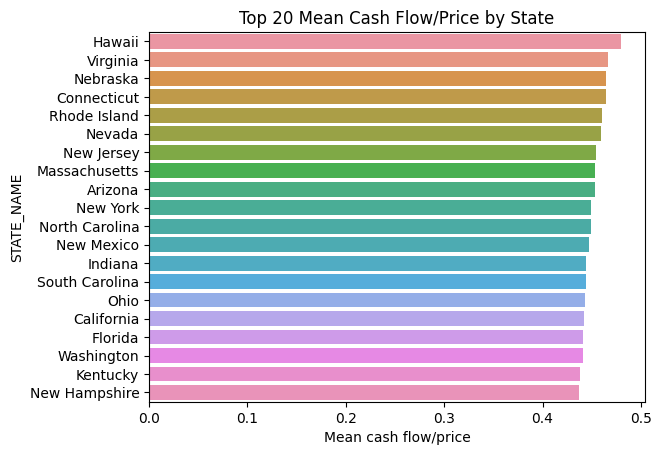

In [13]:
states_m_cf_p=pd.DataFrame({'Mean cash flow/price': dfa.groupby('STATE_NAME')['cf_p'].mean()})
states_m_cf_p.sort_values('Mean cash flow/price',ascending=False,inplace=True)
sns.barplot(y=states_m_cf_p[0:20].index, x=states_m_cf_p[0:20]['Mean cash flow/price'], orient='h')
plt.title("Top 20 Mean Cash Flow/Price by State")
plt.show()

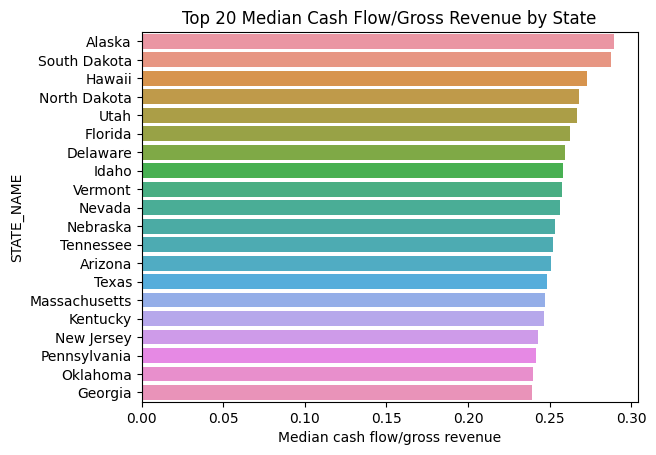

In [14]:
states_m_cf_p=pd.DataFrame({'Median cash flow/gross revenue': dfa.groupby('STATE_NAME')['cf_gr'].median()})
states_m_cf_p.sort_values('Median cash flow/gross revenue',ascending=False,inplace=True)
sns.barplot(y=states_m_cf_p[0:20].index, x=states_m_cf_p[0:20]['Median cash flow/gross revenue'], orient='h')
plt.title("Top 20 Median Cash Flow/Gross Revenue by State")
plt.show()

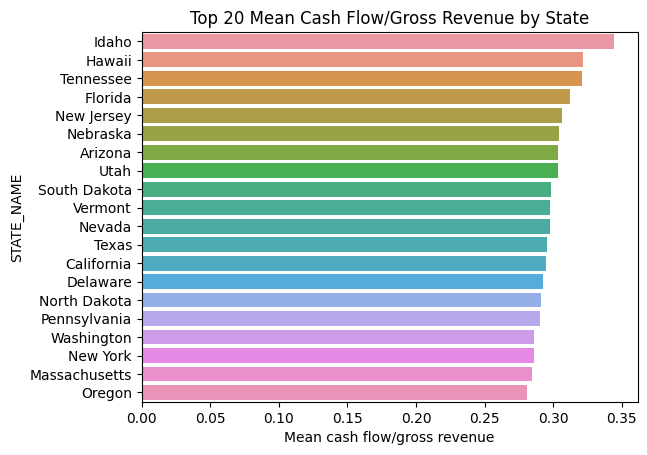

In [15]:
states_m_cf_p=pd.DataFrame({'Mean cash flow/gross revenue': dfa.groupby('STATE_NAME')['cf_gr'].mean()})
states_m_cf_p.sort_values('Mean cash flow/gross revenue',ascending=False,inplace=True)
sns.barplot(y=states_m_cf_p[0:20].index, x=states_m_cf_p[0:20]['Mean cash flow/gross revenue'], orient='h')
plt.title("Top 20 Mean Cash Flow/Gross Revenue by State")
plt.show()

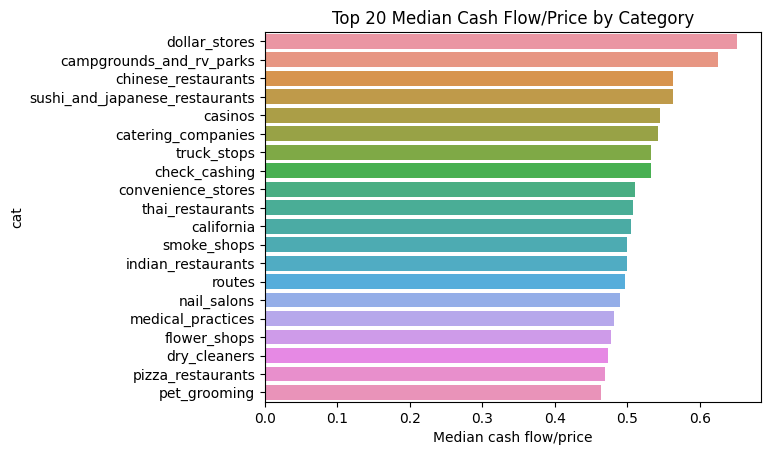

In [16]:
cat_m_cf_p=pd.DataFrame({'Median cash flow/price': dfa.groupby('cat')['cf_p'].median()})
cat_m_cf_p.sort_values('Median cash flow/price',ascending=False,inplace=True)
sns.barplot(y=cat_m_cf_p[0:20].index, x=cat_m_cf_p[0:20]['Median cash flow/price'], orient='h')
plt.title("Top 20 Median Cash Flow/Price by Category")
plt.show()

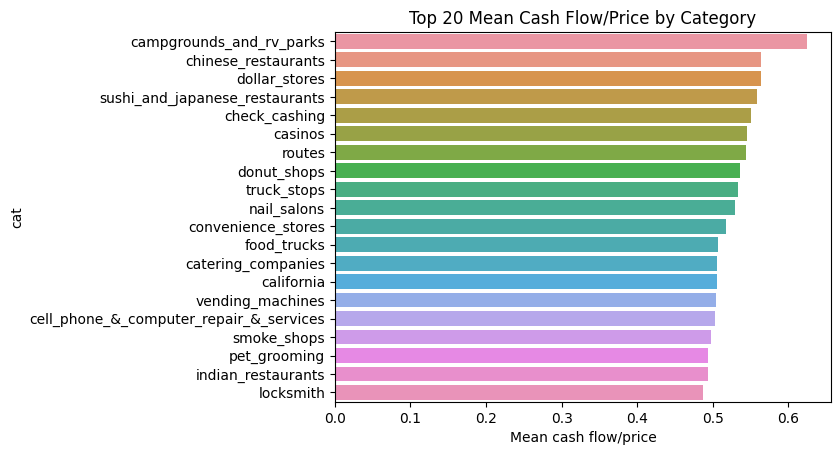

In [17]:
cat_m_cf_p=pd.DataFrame({'Mean cash flow/price': dfa.groupby('cat')['cf_p'].mean()})
cat_m_cf_p.sort_values('Mean cash flow/price',ascending=False,inplace=True)
sns.barplot(y=cat_m_cf_p[0:20].index, x=cat_m_cf_p[0:20]['Mean cash flow/price'], orient='h')
plt.title("Top 20 Mean Cash Flow/Price by Category")
plt.show()

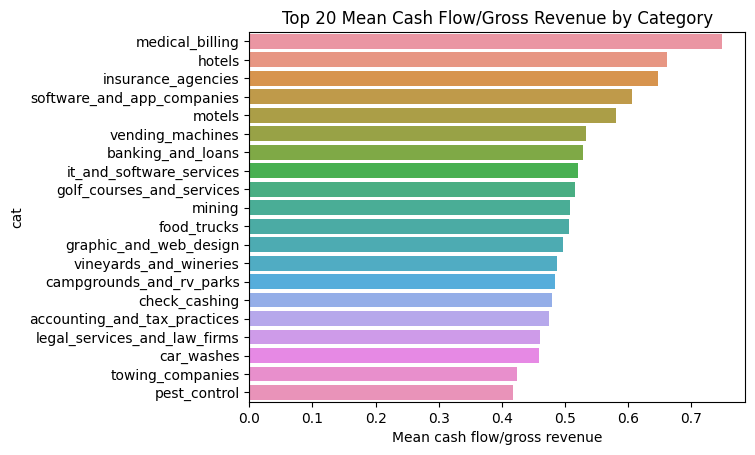

In [18]:
cat_m_cf_gr=pd.DataFrame({'Mean cash flow/gross revenue': dfa.groupby('cat')['cf_gr'].mean()})
cat_m_cf_gr.sort_values('Mean cash flow/gross revenue',ascending=False,inplace=True)
sns.barplot(y=cat_m_cf_gr[0:20].index, x=cat_m_cf_gr[0:20]['Mean cash flow/gross revenue'], orient='h')
plt.title("Top 20 Mean Cash Flow/Gross Revenue by Category")
plt.show()

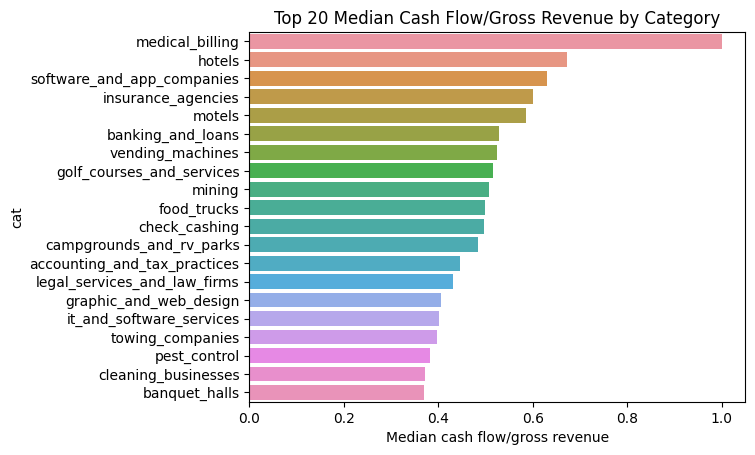

In [19]:
cat_m_cf_gr=pd.DataFrame({'Median cash flow/gross revenue': dfa.groupby('cat')['cf_gr'].median()})
cat_m_cf_gr.sort_values('Median cash flow/gross revenue',ascending=False,inplace=True)
sns.barplot(y=cat_m_cf_gr[0:20].index, x=cat_m_cf_gr[0:20]['Median cash flow/gross revenue'], orient='h')
plt.title("Top 20 Median Cash Flow/Gross Revenue by Category")
plt.show()